In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Classification

In [3]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
xtrain = train.drop('label', axis=1)
ytrain = train['label']

In [7]:
xtest = test.drop('label', axis=1)
ytest = test['label']

In [8]:
xtrain = xtrain/255.0
xtest = xtest/255.0

In [9]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [10]:
xtrain.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [11]:
ytrain.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

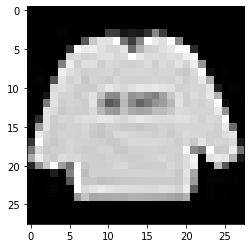

In [20]:
plt.imshow(np.array(xtrain.loc[0]).reshape(28,28), cmap='gray')

In [21]:
label_dict = {0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

In [22]:
x = np.array(xtrain)
y = keras.utils.to_categorical(np.array(ytrain),10)

In [25]:
pd.DataFrame(y).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [28]:
model = Sequential()

In [29]:
model.add(Dense(units=24, input_dim=784)) # first and only hidden layer; 24 neurons; input dims as 784 from shape of x matrix
model.add(Activation('sigmoid')) # to my hidden layer adding a sigmoid activation function
model.add(Dense(units=10)) # output layers; as many neurons as classes
model.add(Activation('softmax')) # classification problem; activation fn of output layer

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [31]:
history = model.fit(x, y, epochs=10, batch_size=1000, validation_split=0.20)

Epoch 1/10
48/48 [==============================] - 1s 7ms/step - loss: 2.2701 - accuracy: 0.1680 - val_loss: 2.2120 - val_accuracy: 0.3178
Epoch 2/10
48/48 [==============================] - 0s 4ms/step - loss: 2.1705 - accuracy: 0.3733 - val_loss: 2.1261 - val_accuracy: 0.4168
Epoch 3/10
48/48 [==============================] - 0s 4ms/step - loss: 2.0913 - accuracy: 0.4426 - val_loss: 2.0523 - val_accuracy: 0.4674
Epoch 4/10
48/48 [==============================] - 0s 5ms/step - loss: 2.0218 - accuracy: 0.4751 - val_loss: 1.9869 - val_accuracy: 0.4909
Epoch 5/10
48/48 [==============================] - 0s 4ms/step - loss: 1.9597 - accuracy: 0.4920 - val_loss: 1.9283 - val_accuracy: 0.5082
Epoch 6/10
48/48 [==============================] - 0s 4ms/step - loss: 1.9039 - accuracy: 0.5053 - val_loss: 1.8753 - val_accuracy: 0.5189
Epoch 7/10
48/48 [==============================] - 0s 4ms/step - loss: 1.8532 - accuracy: 0.5174 - val_loss: 1.8269 - val_accuracy: 0.5338
Epoch 8/10
48/48 [==

In [48]:
p = model.predict(np.array(xtest.loc[15]).reshape(1,784))
print(p)

[[0.08056754 0.06594986 0.07647324 0.06225822 0.0598115  0.13962822
  0.07657529 0.13352992 0.1167197  0.18848647]]


In [49]:
m = np.argmax(p)

In [50]:
label_dict[m]

'Ankle boot'

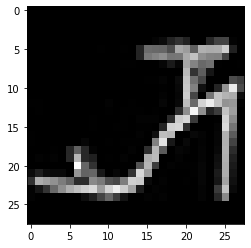

In [52]:
plt.imshow(np.array(xtest.loc[15]).reshape(28,28), cmap='gray')

In [111]:
model1 = Sequential()

In [112]:
model1.add(Dense(units=200, input_dim=784)) 
model1.add(Activation('tanh'))
model1.add(Dense(units=100))
model1.add(Activation('tanh'))
model1.add(Dense(units=50))
model1.add(Activation('sigmoid'))
model1.add(Dense(units=10)) 
model1.add(Activation('softmax'))

In [113]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
history1 = model1.fit(x, y, epochs=20, batch_size=1000, validation_split=0.20)

Epoch 1/20
48/48 [==============================] - 1s 14ms/step - loss: 1.4233 - accuracy: 0.5755 - val_loss: 0.9676 - val_accuracy: 0.7358
Epoch 2/20
48/48 [==============================] - 1s 11ms/step - loss: 0.7855 - accuracy: 0.7852 - val_loss: 0.6470 - val_accuracy: 0.8172
Epoch 3/20
48/48 [==============================] - 1s 12ms/step - loss: 0.5737 - accuracy: 0.8304 - val_loss: 0.5278 - val_accuracy: 0.8346
Epoch 4/20
48/48 [==============================] - 1s 13ms/step - loss: 0.4835 - accuracy: 0.8474 - val_loss: 0.4686 - val_accuracy: 0.8499
Epoch 5/20
48/48 [==============================] - 1s 11ms/step - loss: 0.4313 - accuracy: 0.8614 - val_loss: 0.4277 - val_accuracy: 0.8598
Epoch 6/20
48/48 [==============================] - 1s 12ms/step - loss: 0.4046 - accuracy: 0.8657 - val_loss: 0.4153 - val_accuracy: 0.8594
Epoch 7/20
48/48 [==============================] - 1s 12ms/step - loss: 0.3770 - accuracy: 0.8744 - val_loss: 0.3883 - val_accuracy: 0.8677
Epoch 8/20
48

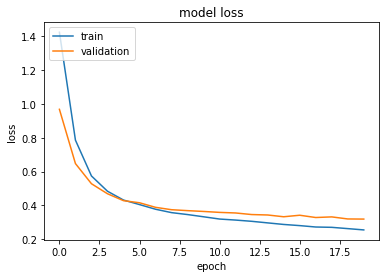

In [115]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

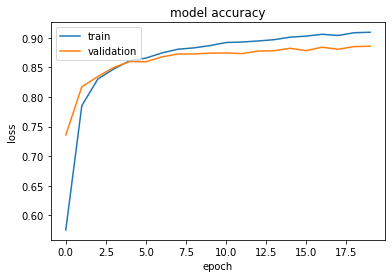

In [126]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

In [118]:
preds = model1.predict(np.array(xtest))

In [119]:
preds

array([[7.8837317e-01, 6.8252638e-04, 5.2365186e-03, ..., 1.1875187e-04,
        1.1788906e-03, 1.8551247e-04],
       [6.3783553e-04, 9.9587232e-01, 8.5343642e-04, ..., 2.9462940e-04,
        3.0496409e-05, 2.9138825e-04],
       [2.1406170e-02, 2.0155045e-03, 7.7272284e-01, ..., 5.2429241e-04,
        1.2293895e-03, 2.5845270e-04],
       ...,
       [9.7756521e-05, 3.5118421e-05, 1.8403018e-04, ..., 2.3442184e-04,
        9.9772769e-01, 8.4371182e-05],
       [3.2871652e-02, 2.4280178e-04, 4.9165930e-03, ..., 1.7494711e-03,
        8.6632532e-01, 7.6874392e-04],
       [4.0812329e-03, 8.5170227e-01, 7.6303937e-02, ..., 7.2535040e-04,
        1.4921341e-03, 2.4725345e-03]], dtype=float32)

In [120]:
preds.shape

(10000, 10)

In [121]:
pred_classes = np.argmax(preds, axis=1)

In [122]:
pred_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [123]:
pred_classes.shape

(10000,)

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(ytest, pred_classes)

0.8879

In [127]:
from keras.regularizers import l1, l2

In [129]:
from keras.layers import Dropout

In [155]:
model2 = Sequential()

In [156]:
model2.add(Dense(units=200, input_dim=784, kernel_regularizer=l1(0.001)))  
model2.add(Activation('tanh'))
model2.add(Dense(units=100))
model2.add(Activation('tanh'))
model2.add(Dropout(0.2, seed=42))
model2.add(Dense(units=50))
model2.add(Activation('sigmoid'))
model2.add(Dense(units=10)) 
model2.add(Activation('softmax'))

In [157]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [158]:
history2 = model2.fit(x, y, epochs=20, batch_size=1000, validation_split=0.20)

Epoch 1/20
48/48 [==============================] - 1s 12ms/step - loss: 5.3555 - accuracy: 0.5493 - val_loss: 2.8358 - val_accuracy: 0.7143
Epoch 2/20
48/48 [==============================] - 0s 10ms/step - loss: 1.7316 - accuracy: 0.7427 - val_loss: 1.1667 - val_accuracy: 0.7566
Epoch 3/20
48/48 [==============================] - 0s 10ms/step - loss: 1.0093 - accuracy: 0.7685 - val_loss: 0.9055 - val_accuracy: 0.7784
Epoch 4/20
48/48 [==============================] - 0s 10ms/step - loss: 0.8572 - accuracy: 0.7874 - val_loss: 0.8286 - val_accuracy: 0.7873
Epoch 5/20
48/48 [==============================] - 1s 11ms/step - loss: 0.7910 - accuracy: 0.7958 - val_loss: 0.7570 - val_accuracy: 0.8022
Epoch 6/20
48/48 [==============================] - 1s 11ms/step - loss: 0.7307 - accuracy: 0.8091 - val_loss: 0.7319 - val_accuracy: 0.8064
Epoch 7/20
48/48 [==============================] - 0s 10ms/step - loss: 0.7096 - accuracy: 0.8101 - val_loss: 0.7012 - val_accuracy: 0.8159
Epoch 8/20
48

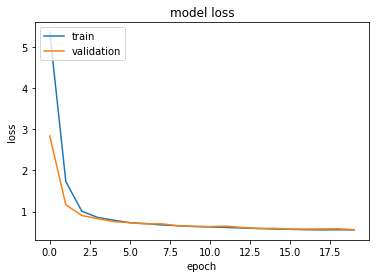

In [159]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

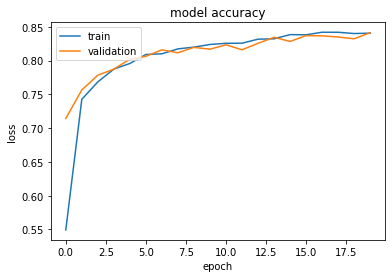

In [160]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

In [161]:
preds = model2.predict(np.array(xtest))

In [162]:
pred_classes = np.argmax(preds, axis=1)

In [163]:
accuracy_score(ytest, pred_classes)

0.8452

In [164]:
from keras.wrappers.scikit_learn import KerasClassifier

In [185]:
from sklearn.model_selection import GridSearchCV

In [192]:
def create_model(opt='adam',neurons=[200,100,50]):
    model = Sequential()
    model.add(Dense(units=neurons[0], input_dim=784, kernel_regularizer=l1(0.001)))  
    model.add(Activation('tanh'))
    model.add(Dense(units=neurons[1]))
    model.add(Activation('tanh'))
    model.add(Dropout(0.2, seed=42))
    model.add(Dense(units=neurons[2]))
    model.add(Activation('sigmoid'))
    model.add(Dense(units=10)) 
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [193]:
model = KerasClassifier(build_fn=create_model, verbose=2, epochs=10) # mention batch_size if not hyperparameter tuning

In [194]:
param_grid = {'batch_size':[500,1000],
             'opt':['sgd','adam'],
             'neurons':[[200,100,50],[150,75,30]]
             }

In [195]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [196]:
grid_result = grid.fit(x, y)

Epoch 1/10
96/96 [==============================] - 1s 7ms/step - loss: 8.2281 - accuracy: 0.2866
Epoch 2/10
96/96 [==============================] - 1s 7ms/step - loss: 7.8369 - accuracy: 0.4919
Epoch 3/10
96/96 [==============================] - 1s 8ms/step - loss: 7.5110 - accuracy: 0.5484
Epoch 4/10
96/96 [==============================] - 1s 8ms/step - loss: 7.2298 - accuracy: 0.5725
Epoch 5/10
96/96 [==============================] - 1s 8ms/step - loss: 6.9773 - accuracy: 0.5907
Epoch 6/10
96/96 [==============================] - 1s 8ms/step - loss: 6.7448 - accuracy: 0.6062
Epoch 7/10
96/96 [==============================] - 1s 8ms/step - loss: 6.5271 - accuracy: 0.6189
Epoch 8/10
96/96 [==============================] - 1s 8ms/step - loss: 6.3237 - accuracy: 0.6351
Epoch 9/10
96/96 [==============================] - 1s 9ms/step - loss: 6.1315 - accuracy: 0.6492
Epoch 10/10
24/24 [==============================] - 0s 5ms/step - loss: 5.8433 - accuracy: 0.6704
Epoch 1/10
96/96 [=

96/96 [==============================] - 1s 13ms/step - loss: 0.6554 - accuracy: 0.8189
Epoch 8/10
96/96 [==============================] - 1s 11ms/step - loss: 0.6284 - accuracy: 0.8256
Epoch 9/10
96/96 [==============================] - 1s 10ms/step - loss: 0.6231 - accuracy: 0.8249
Epoch 10/10
24/24 [==============================] - 0s 5ms/step - loss: 0.5829 - accuracy: 0.8409
Epoch 1/10
96/96 [==============================] - 1s 9ms/step - loss: 3.5832 - accuracy: 0.6511
Epoch 2/10
96/96 [==============================] - 1s 10ms/step - loss: 0.9826 - accuracy: 0.7699
Epoch 3/10
96/96 [==============================] - 1s 10ms/step - loss: 0.8114 - accuracy: 0.7914
Epoch 4/10
96/96 [==============================] - 1s 10ms/step - loss: 0.7335 - accuracy: 0.8053
Epoch 5/10
96/96 [==============================] - 1s 11ms/step - loss: 0.6936 - accuracy: 0.8114
Epoch 6/10
96/96 [==============================] - 1s 11ms/step - loss: 0.6663 - accuracy: 0.8171
Epoch 7/10
96/96 [====

96/96 [==============================] - 1s 9ms/step - loss: 0.9586 - accuracy: 0.7561
Epoch 4/10
96/96 [==============================] - 1s 9ms/step - loss: 0.8352 - accuracy: 0.7771
Epoch 5/10
96/96 [==============================] - 1s 8ms/step - loss: 0.7613 - accuracy: 0.7926
Epoch 6/10
96/96 [==============================] - 1s 8ms/step - loss: 0.7236 - accuracy: 0.8029
Epoch 7/10
96/96 [==============================] - 1s 8ms/step - loss: 0.6813 - accuracy: 0.8141
Epoch 8/10
96/96 [==============================] - 1s 9ms/step - loss: 0.6720 - accuracy: 0.8168
Epoch 9/10
96/96 [==============================] - 1s 8ms/step - loss: 0.6371 - accuracy: 0.8243
Epoch 10/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.8322
Epoch 1/10
96/96 [==============================] - 1s 7ms/step - loss: 3.3409 - accuracy: 0.5610
Epoch 2/10
96/96 [==============================] - 1s 9ms/step - loss: 1.1319 - accuracy: 0.7420
Epoch 3/10
96/96 [============

48/48 [==============================] - 1s 19ms/step - loss: 7.0432 - accuracy: 0.6002 0s - loss: 7.0
Epoch 10/10
12/12 [==============================] - 0s 7ms/step - loss: 6.8542 - accuracy: 0.6190
Epoch 1/10
48/48 [==============================] - 1s 14ms/step - loss: 8.4282 - accuracy: 0.1549
Epoch 2/10
48/48 [==============================] - 1s 16ms/step - loss: 8.1759 - accuracy: 0.3769
Epoch 3/10
48/48 [==============================] - 1s 17ms/step - loss: 7.9832 - accuracy: 0.5080
Epoch 4/10
48/48 [==============================] - 1s 17ms/step - loss: 7.7992 - accuracy: 0.5416
Epoch 5/10
48/48 [==============================] - 1s 16ms/step - loss: 7.6256 - accuracy: 0.5565
Epoch 6/10
48/48 [==============================] - 1s 18ms/step - loss: 7.4648 - accuracy: 0.5658 0s - los
Epoch 7/10
48/48 [==============================] - 1s 17ms/step - loss: 7.3137 - accuracy: 0.5788
Epoch 8/10
48/48 [==============================] - 1s 17ms/step - loss: 7.1733 - accuracy: 0.58

48/48 [==============================] - 1s 15ms/step - loss: 6.5288 - accuracy: 0.4371
Epoch 5/10
48/48 [==============================] - 1s 15ms/step - loss: 6.3953 - accuracy: 0.4816
Epoch 6/10
48/48 [==============================] - 1s 18ms/step - loss: 6.2697 - accuracy: 0.5341
Epoch 7/10
48/48 [==============================] - 1s 16ms/step - loss: 6.1502 - accuracy: 0.5654
Epoch 8/10
48/48 [==============================] - 1s 19ms/step - loss: 6.0372 - accuracy: 0.5812
Epoch 9/10
48/48 [==============================] - 1s 17ms/step - loss: 5.9281 - accuracy: 0.5970
Epoch 10/10
12/12 [==============================] - 0s 7ms/step - loss: 5.7559 - accuracy: 0.6212
Epoch 1/10
48/48 [==============================] - 1s 12ms/step - loss: 7.0210 - accuracy: 0.1509
Epoch 2/10
48/48 [==============================] - 1s 14ms/step - loss: 6.8174 - accuracy: 0.2708
Epoch 3/10
48/48 [==============================] - 1s 14ms/step - loss: 6.6624 - accuracy: 0.3716
Epoch 4/10
48/48 [===

Epoch 10/10
12/12 [==============================] - 0s 6ms/step - loss: 0.6510 - accuracy: 0.8253
Epoch 1/10
48/48 [==============================] - 1s 13ms/step - loss: 4.8862 - accuracy: 0.4085
Epoch 2/10
48/48 [==============================] - 1s 16ms/step - loss: 2.0156 - accuracy: 0.7078
Epoch 3/10
48/48 [==============================] - 1s 15ms/step - loss: 1.2583 - accuracy: 0.7516
Epoch 4/10
48/48 [==============================] - 1s 15ms/step - loss: 1.0448 - accuracy: 0.7721
Epoch 5/10
48/48 [==============================] - 1s 16ms/step - loss: 0.9238 - accuracy: 0.7874
Epoch 6/10
48/48 [==============================] - 1s 16ms/step - loss: 0.8424 - accuracy: 0.7983
Epoch 7/10
48/48 [==============================] - 1s 15ms/step - loss: 0.7907 - accuracy: 0.8052
Epoch 8/10
48/48 [==============================] - 1s 16ms/step - loss: 0.7608 - accuracy: 0.8060
Epoch 9/10
48/48 [==============================] - 1s 17ms/step - loss: 0.7232 - accuracy: 0.8135 0s - loss:

In [197]:
grid_result.best_params_

{'batch_size': 500, 'neurons': [150, 75, 30], 'opt': 'adam'}

In [198]:
grid_result.best_score_

0.8281166672706604

In [199]:
final_model = Sequential()

In [200]:
final_model.add(Dense(units=150, input_dim=784, kernel_regularizer=l1(0.001)))  
final_model.add(Activation('tanh'))

final_model.add(Dense(units=75))
final_model.add(Activation('tanh'))

final_model.add(Dropout(0.2, seed=42))

final_model.add(Dense(units=30))
final_model.add(Activation('sigmoid'))
    
final_model.add(Dense(units=10)) 
final_model.add(Activation('softmax'))

final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

final_history = final_model.fit(x, y, epochs=20, batch_size=500, validation_split=0.20)

Epoch 1/20
96/96 [==============================] - 1s 10ms/step - loss: 3.3689 - accuracy: 0.6332 - val_loss: 1.4157 - val_accuracy: 0.7478
Epoch 2/20
96/96 [==============================] - 1s 9ms/step - loss: 1.1581 - accuracy: 0.7612 - val_loss: 0.9944 - val_accuracy: 0.7724
Epoch 3/20
96/96 [==============================] - 1s 9ms/step - loss: 0.9069 - accuracy: 0.7874 - val_loss: 0.8202 - val_accuracy: 0.7986
Epoch 4/20
96/96 [==============================] - 1s 9ms/step - loss: 0.8079 - accuracy: 0.7973 - val_loss: 0.7430 - val_accuracy: 0.8095
Epoch 5/20
96/96 [==============================] - 1s 9ms/step - loss: 0.7430 - accuracy: 0.8076 - val_loss: 0.7411 - val_accuracy: 0.7973
Epoch 6/20
96/96 [==============================] - 1s 9ms/step - loss: 0.7085 - accuracy: 0.8120 - val_loss: 0.6758 - val_accuracy: 0.8155
Epoch 7/20
96/96 [==============================] - 1s 9ms/step - loss: 0.6750 - accuracy: 0.8178 - val_loss: 0.6562 - val_accuracy: 0.8209
Epoch 8/20
96/96 [=

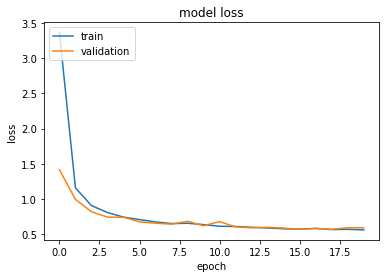

In [201]:
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

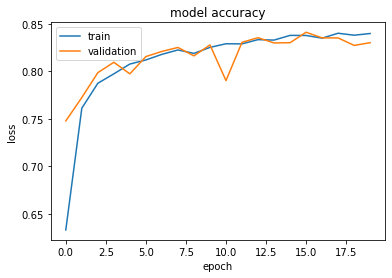

In [202]:
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

In [203]:
preds = final_model.predict(np.array(xtest))

pred_classes = np.argmax(preds, axis=1)

accuracy_score(ytest, pred_classes)

0.832

## Regression

In [250]:
np.set_printoptions(precision=3, suppress=True)

In [252]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t', #ignore commented lines
                          sep=' ', skipinitialspace=True) #Skip spaces after delimiter.

In [253]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [254]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3:'Japan'})

In [255]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [210]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [256]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Europe          0
Japan           0
USA             0
dtype: int64

In [257]:
dataset = dataset.dropna()

In [216]:
dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.514573,7.815984
Cylinders,5.454774,1.701004
Displacement,193.425879,104.269838
Horsepower,104.469388,38.491160
Weight,2970.424623,846.841774
Acceleration,15.568090,2.757689
Model Year,76.010050,3.697627
Europe,0.175879,0.381197
Japan,0.198492,0.399367
USA,0.625628,0.484569


In [258]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

In [224]:
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
198,33.0,4,91.0,53.0,1795.0,17.4,76,0,1,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
33,19.0,6,232.0,100.0,2634.0,13.0,71,0,0,1
208,13.0,8,318.0,150.0,3940.0,13.2,76,0,0,1
93,14.0,8,318.0,150.0,4237.0,14.5,73,0,0,1


In [259]:
train_features = train_dataset.drop(columns='MPG', axis=1)
test_features = test_dataset.drop(columns='MPG', axis=1)

In [260]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [235]:
from keras.layers import Normalization

In [261]:
normalizer = Normalization(axis=-1)

In [262]:
normalizer.adapt(np.array(train_features))

In [268]:
print(normalizer.mean.numpy())

[[   5.532  197.855  105.971 3005.746   15.511   75.911    0.172    0.204
     0.624]]


In [264]:
print(np.array(train_features[:1]))
print(normalizer(np.array(train_features[:1])).numpy())

[[   4.   96.   69. 2189.   18.   72.    1.    0.    0.]]
[[-0.887 -0.958 -0.934 -0.952  0.889 -1.062  2.194 -0.506 -1.289]]


### With One Input

In [269]:
horsepower = np.array(train_features['Horsepower'])

In [270]:
hp_normalizer = Normalization(input_shape=[1,], axis=None)
hp_normalizer.adapt(horsepower)

In [271]:
hp_model = Sequential([
    hp_normalizer,
    Dense(units=1)
])

In [272]:
hp_model.summary()

Model: "sequential_169"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_677 (Dense)            (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [274]:
import tensorflow as tf

In [275]:
hp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [276]:
history = hp_model.fit(train_features['Horsepower'], train_labels, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
8/8 - 0s - loss: 23.0582 - val_loss: 21.3906
Epoch 2/100
8/8 - 0s - loss: 22.2493 - val_loss: 20.6098
Epoch 3/100
8/8 - 0s - loss: 21.4507 - val_loss: 19.8521
Epoch 4/100
8/8 - 0s - loss: 20.6461 - val_loss: 19.0898
Epoch 5/100
8/8 - 0s - loss: 19.8294 - val_loss: 18.3079
Epoch 6/100
8/8 - 0s - loss: 19.0226 - val_loss: 17.5208
Epoch 7/100
8/8 - 0s - loss: 18.2194 - val_loss: 16.7271
Epoch 8/100
8/8 - 0s - loss: 17.4140 - val_loss: 15.9510
Epoch 9/100
8/8 - 0s - loss: 16.6133 - val_loss: 15.1858
Epoch 10/100
8/8 - 0s - loss: 15.8010 - val_loss: 14.4006
Epoch 11/100
8/8 - 0s - loss: 14.9973 - val_loss: 13.6262
Epoch 12/100
8/8 - 0s - loss: 14.2043 - val_loss: 12.8682
Epoch 13/100
8/8 - 0s - loss: 13.3823 - val_loss: 12.0814
Epoch 14/100
8/8 - 0s - loss: 12.5797 - val_loss: 11.3052
Epoch 15/100
8/8 - 0s - loss: 11.7735 - val_loss: 10.5163
Epoch 16/100
8/8 - 0s - loss: 10.9680 - val_loss: 9.7325
Epoch 17/100
8/8 - 0s - loss: 10.1805 - val_loss: 8.9694
Epoch 18/100
8/8 - 0s - l

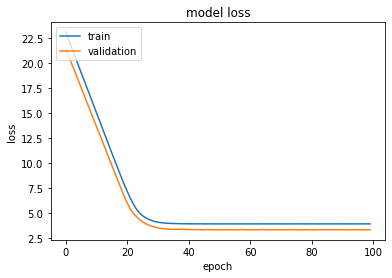

In [277]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

In [278]:
test_results = {}

test_results['hp_model_linreg'] = hp_model.evaluate(test_features['Horsepower'], test_labels)

3/3 [==============================] - 0s 997us/step - loss: 3.9446


In [279]:
test_results

{'hp_model_linreg': 3.944617748260498}

In [280]:
x = tf.linspace(0,250,251)
y = hp_model.predict(x)

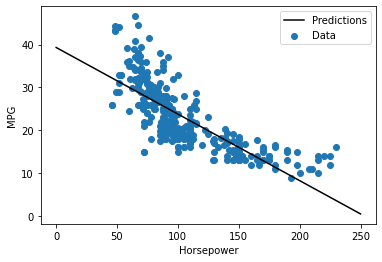

In [281]:
plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(x ,y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

### With Mulitple Input

In [282]:
linear_model = Sequential([
    normalizer,
    Dense(units=1)
])

In [283]:
linear_model.summary()

Model: "sequential_170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_678 (Dense)            (None, 1)                 10        
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [284]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [285]:
history = linear_model.fit(train_features, train_labels, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
8/8 - 0s - loss: 23.1887 - val_loss: 21.8042
Epoch 2/100
8/8 - 0s - loss: 22.1898 - val_loss: 21.1472
Epoch 3/100
8/8 - 0s - loss: 21.3168 - val_loss: 20.4959
Epoch 4/100
8/8 - 0s - loss: 20.4753 - val_loss: 19.8672
Epoch 5/100
8/8 - 0s - loss: 19.6303 - val_loss: 19.2915
Epoch 6/100
8/8 - 0s - loss: 18.8015 - val_loss: 18.7535
Epoch 7/100
8/8 - 0s - loss: 17.9061 - val_loss: 18.1037
Epoch 8/100
8/8 - 0s - loss: 17.0740 - val_loss: 17.5125
Epoch 9/100
8/8 - 0s - loss: 16.2209 - val_loss: 16.9114
Epoch 10/100
8/8 - 0s - loss: 15.3970 - val_loss: 16.3361
Epoch 11/100
8/8 - 0s - loss: 14.5657 - val_loss: 15.7679
Epoch 12/100
8/8 - 0s - loss: 13.7411 - val_loss: 15.1444
Epoch 13/100
8/8 - 0s - loss: 12.9623 - val_loss: 14.5075
Epoch 14/100
8/8 - 0s - loss: 12.2350 - val_loss: 13.8928
Epoch 15/100
8/8 - 0s - loss: 11.4912 - val_loss: 12.9452
Epoch 16/100
8/8 - 0s - loss: 10.7374 - val_loss: 12.0924
Epoch 17/100
8/8 - 0s - loss: 10.0076 - val_loss: 11.1457
Epoch 18/100
8/8 - 0s -

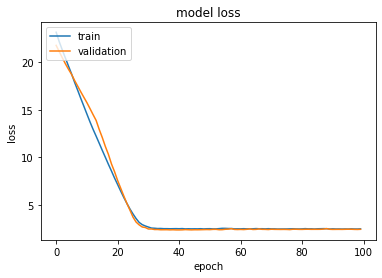

In [286]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

In [287]:
test_results['model_linreg'] = linear_model.evaluate(test_features, test_labels)

3/3 [==============================] - 0s 997us/step - loss: 2.5040


In [288]:
test_results

{'hp_model_linreg': 3.944617748260498, 'model_linreg': 2.5039665699005127}

In [289]:
linear_model.predict(test_features[:10])

array([[14.464],
       [19.276],
       [21.391],
       [22.648],
       [17.38 ],
       [ 8.146],
       [22.876],
       [25.154],
       [24.843],
       [28.323]], dtype=float32)

In [292]:
linear_model.layers[1].kernel

<tf.Variable 'dense_678/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-1.46 ],
       [ 1.902],
       [-0.237],
       [-4.641],
       [-0.017],
       [ 2.507],
       [-0.078],
       [ 0.706],
       [-1.013]], dtype=float32)>

### DNN

In [298]:
def build_model(norm):
    model = Sequential([
        norm,
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')
    return model

### Deep Neural Network with One Input

In [299]:
dnn_hp_model = build_model(hp_normalizer)

In [300]:
dnn_hp_model.summary()

Model: "sequential_172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_682 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_683 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_684 (Dense)            (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [301]:
history = dnn_hp_model.fit(train_features['Horsepower'], train_labels, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
8/8 - 0s - loss: 23.2647 - val_loss: 21.8525
Epoch 2/100
8/8 - 0s - loss: 23.0417 - val_loss: 21.6202
Epoch 3/100
8/8 - 0s - loss: 22.8069 - val_loss: 21.3561
Epoch 4/100
8/8 - 0s - loss: 22.5211 - val_loss: 21.0357
Epoch 5/100
8/8 - 0s - loss: 22.1686 - val_loss: 20.6191
Epoch 6/100
8/8 - 0s - loss: 21.6976 - val_loss: 20.0693
Epoch 7/100
8/8 - 0s - loss: 21.0867 - val_loss: 19.3624
Epoch 8/100
8/8 - 0s - loss: 20.3186 - val_loss: 18.4708
Epoch 9/100
8/8 - 0s - loss: 19.3333 - val_loss: 17.3628
Epoch 10/100
8/8 - 0s - loss: 18.1640 - val_loss: 16.1456
Epoch 11/100
8/8 - 0s - loss: 16.8148 - val_loss: 14.8195
Epoch 12/100
8/8 - 0s - loss: 15.3500 - val_loss: 13.3543
Epoch 13/100
8/8 - 0s - loss: 13.7231 - val_loss: 11.7934
Epoch 14/100
8/8 - 0s - loss: 11.8698 - val_loss: 10.0483
Epoch 15/100
8/8 - 0s - loss: 9.8785 - val_loss: 8.0840
Epoch 16/100
8/8 - 0s - loss: 7.6328 - val_loss: 5.9561
Epoch 17/100
8/8 - 0s - loss: 5.4960 - val_loss: 4.4849
Epoch 18/100
8/8 - 0s - loss:

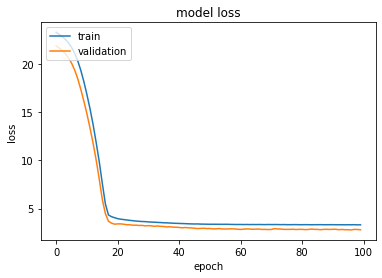

In [302]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

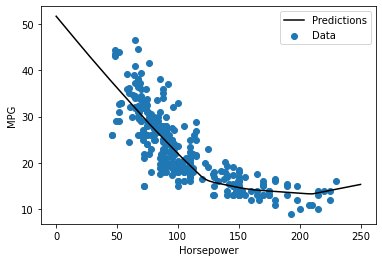

In [303]:
x = tf.linspace(0,250,251)
y = dnn_hp_model.predict(x)

plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(x ,y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [304]:
test_results['dnn_hp_model'] = dnn_hp_model.evaluate(test_features['Horsepower'], test_labels)

3/3 [==============================] - 0s 998us/step - loss: 3.4445


In [305]:
test_results

{'hp_model_linreg': 3.944617748260498,
 'model_linreg': 2.5039665699005127,
 'dnn_hp_model': 3.444467782974243}

### DNN with Multiple Inputs

In [306]:
dnn_model = build_model(normalizer)

In [308]:
history = dnn_model.fit(train_features, train_labels, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
8/8 - 0s - loss: 23.2457 - val_loss: 21.6096
Epoch 2/100
8/8 - 0s - loss: 22.4964 - val_loss: 20.8551
Epoch 3/100
8/8 - 0s - loss: 21.6868 - val_loss: 19.9908
Epoch 4/100
8/8 - 0s - loss: 20.7092 - val_loss: 18.9142
Epoch 5/100
8/8 - 0s - loss: 19.4618 - val_loss: 17.5391
Epoch 6/100
8/8 - 0s - loss: 17.8685 - val_loss: 15.7675
Epoch 7/100
8/8 - 0s - loss: 15.9181 - val_loss: 13.8185
Epoch 8/100
8/8 - 0s - loss: 13.7536 - val_loss: 11.9112
Epoch 9/100
8/8 - 0s - loss: 11.3730 - val_loss: 10.0793
Epoch 10/100
8/8 - 0s - loss: 8.9861 - val_loss: 8.2560
Epoch 11/100
8/8 - 0s - loss: 7.4333 - val_loss: 7.0394
Epoch 12/100
8/8 - 0s - loss: 6.6306 - val_loss: 6.3492
Epoch 13/100
8/8 - 0s - loss: 5.9672 - val_loss: 5.6944
Epoch 14/100
8/8 - 0s - loss: 5.2439 - val_loss: 5.1676
Epoch 15/100
8/8 - 0s - loss: 4.6131 - val_loss: 4.5897
Epoch 16/100
8/8 - 0s - loss: 4.1089 - val_loss: 3.9828
Epoch 17/100
8/8 - 0s - loss: 3.6680 - val_loss: 3.5004
Epoch 18/100
8/8 - 0s - loss: 3.2634 - 

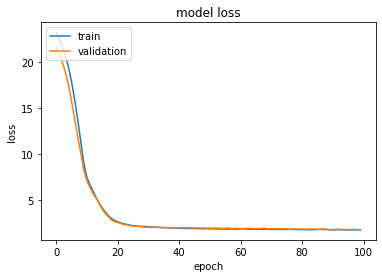

In [309]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

In [310]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels)

3/3 [==============================] - 0s 2ms/step - loss: 1.7861


In [311]:
test_results

{'hp_model_linreg': 3.944617748260498,
 'model_linreg': 2.5039665699005127,
 'dnn_hp_model': 3.444467782974243,
 'dnn_model': 1.7861276865005493}

In [314]:
test_predictions = dnn_model.predict(test_features).flatten()

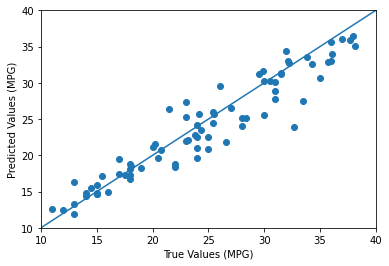

In [319]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (MPG)')
plt.ylabel('Predicted Values (MPG)')
lims = [10,40]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [327]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)

In [328]:
history = dnn_model.fit(train_features, train_labels, epochs=100, verbose=2, validation_split=0.2, callbacks=[stop_early])

Epoch 1/100
8/8 - 0s - loss: 1.6898 - val_loss: 1.7298
Epoch 2/100
8/8 - 0s - loss: 1.6878 - val_loss: 1.7343
Epoch 3/100
8/8 - 0s - loss: 1.6988 - val_loss: 1.7327
Epoch 4/100
8/8 - 0s - loss: 1.6807 - val_loss: 1.7251
Epoch 5/100
8/8 - 0s - loss: 1.6831 - val_loss: 1.7396
Epoch 6/100
8/8 - 0s - loss: 1.6838 - val_loss: 1.7670
Epoch 7/100
8/8 - 0s - loss: 1.6882 - val_loss: 1.7218
Epoch 8/100
8/8 - 0s - loss: 1.6877 - val_loss: 1.7183
Epoch 9/100
8/8 - 0s - loss: 1.6737 - val_loss: 1.7214
Epoch 10/100
8/8 - 0s - loss: 1.6723 - val_loss: 1.7434
Epoch 11/100
8/8 - 0s - loss: 1.6683 - val_loss: 1.7183
Epoch 12/100
8/8 - 0s - loss: 1.6643 - val_loss: 1.7083
Epoch 13/100
8/8 - 0s - loss: 1.6727 - val_loss: 1.7239
Epoch 14/100
8/8 - 0s - loss: 1.6642 - val_loss: 1.7247
Epoch 15/100
8/8 - 0s - loss: 1.6773 - val_loss: 1.7390
Epoch 16/100
8/8 - 0s - loss: 1.6739 - val_loss: 1.6795
Epoch 17/100
8/8 - 0s - loss: 1.6589 - val_loss: 1.7085
Epoch 18/100
8/8 - 0s - loss: 1.6489 - val_loss: 1.6979
E

In [335]:
def build_model(norm):
    model = Sequential([
        norm,
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')
    return model

In [336]:
dnn_reg_dropout_model = build_model(normalizer)

In [337]:
history = dnn_reg_dropout_model.fit(train_features, train_labels, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
8/8 - 0s - loss: 23.3114 - val_loss: 21.6507
Epoch 2/100
8/8 - 0s - loss: 22.5851 - val_loss: 20.9662
Epoch 3/100
8/8 - 0s - loss: 21.7085 - val_loss: 20.1471
Epoch 4/100
8/8 - 0s - loss: 20.7200 - val_loss: 19.0946
Epoch 5/100
8/8 - 0s - loss: 19.4623 - val_loss: 17.7162
Epoch 6/100
8/8 - 0s - loss: 17.7880 - val_loss: 15.9196
Epoch 7/100
8/8 - 0s - loss: 15.5923 - val_loss: 13.5874
Epoch 8/100
8/8 - 0s - loss: 12.7643 - val_loss: 10.6980
Epoch 9/100
8/8 - 0s - loss: 9.5413 - val_loss: 7.9281
Epoch 10/100
8/8 - 0s - loss: 6.7311 - val_loss: 5.9682
Epoch 11/100
8/8 - 0s - loss: 5.6777 - val_loss: 5.3662
Epoch 12/100
8/8 - 0s - loss: 5.7965 - val_loss: 4.8732
Epoch 13/100
8/8 - 0s - loss: 5.2630 - val_loss: 4.3473
Epoch 14/100
8/8 - 0s - loss: 4.5601 - val_loss: 4.1173
Epoch 15/100
8/8 - 0s - loss: 4.5213 - val_loss: 3.9975
Epoch 16/100
8/8 - 0s - loss: 4.4180 - val_loss: 3.5040
Epoch 17/100
8/8 - 0s - loss: 4.3028 - val_loss: 3.1524
Epoch 18/100
8/8 - 0s - loss: 4.2039 - va

In [338]:
test_results['dnn_reg_dropout_model'] = dnn_reg_dropout_model.evaluate(test_features, test_labels)

3/3 [==============================] - 0s 997us/step - loss: 2.1362


In [339]:
test_results

{'hp_model_linreg': 3.944617748260498,
 'model_linreg': 2.5039665699005127,
 'dnn_hp_model': 3.444467782974243,
 'dnn_model': 1.7861276865005493,
 'dnn_reg_dropout_model': 2.136164665222168}